# Example 3: The `mm2SANS` `Experiment` class

Calculate and plot the neutron scattering cross sections. The following example uses the settings specified in the previous `Sample` and `Probe` examples.

In [1]:
import mm2SANS
import numpy as np

In [2]:
""" create the Sample object (using settings from Example 1)"""
sample = mm2SANS.Sample(
    sample_name = 'test',
    positions=[[0, 0, 0]],
    moments=[[0, 0, 1]],
    scattering_length_density=(8.024-0.001j),
    saturation_magnetisation=800e3,
    voxel_volumes= 4/3 * np.pi * 10e-9**3 ,
    periodicity=(50e-9, 50e-9, 50e-9),
    print_diagnostics=True,
    )

""" create a Detector object (using Settings from Example 2) """
print()
probe = mm2SANS.Probe(
                  sans_instrument='test'
                , neutron_wavelength=6e-10 # in m
                , detector_distance=15 # in m
                , neutron_polarisation=(0,0,1)
                , qmap_disorder=0.35 # to avoid Fourier transform artefacts
               )
probe.Beamline.print_beamline_settings()

""" create an Experiment object and calculate the scattering patterns """
experiment = mm2SANS.Experiment(sample, probe, print_diagnostics=False)
experiment.calc_scattering_pattern(uc_repetitions=(1,1,1), print_diagnostics=False)
print('\nscattering patterns calculated!')

REMARK: Voxel volumes were not corrected.
1 positions with an average sphere diameter of 20.00 nm, and an average moment of 1.2e+05 mu_Bohr.

Neutron wavelength = 6.0 Angstrom, detector distance = 15 m
Neutron polarisation set to [0. 0. 1.] in sample environment coordinate system (u, v, w), 

scattering patterns calculated!


## Data table for the calculated scattering patterns

The calculated values are stored in `Experiment.data`, which is a `pandas` DataFrame table with the following columns:

- `q_U`, `q_V`, `q_W`, `q_abs`, `q_phi` Scattering vector components $q_U$, $q_V$, $q_W$ (in m$^{-1}$).  In addition, the lengths $|q_{VW}|$ of the scattering vectors and their angle $\phi_{q_{VW}}$ in the detector plane are stored. 
- `b_N`, `b_MU`, `b_MV`, `b_MW`: Complex-valued scattering length for the nuclear component $b_N(\vec{Q})$ and the magnetic components $\vec{b}_{\vec{M}_\perp}(\vec{Q})$. These values (in m) already take into account the pre-factors from the material scattering length densities and saturation magnetisation, respectively.
- `T1` to `T5`: Real-valued individual components to the scattering cross sections (in m$^2$).
- `I_?`: Scattering cross sections (in m$^2$), which include:
    - `I_pp`, `I_mm`, `I_pm`, `I_mp`: Non-spin-flip and spin-flip cross sections accessible in a SANS experiment with polariser and analyser.
    - `I_p`, `I_m`, `I_dif`: Half-polarised cross sections for flipper on/off, and difference signal $\Delta(\vec{Q})=I_+-I_-$.
    - `I_sum`: Total scattering cross section $\Sigma(\vec{Q})=I_++I_-$.
- `asym`: Spin asymmetry $\Delta/\Sigma$ (value between -1 and +1).

At the moment (2021-06-02) the scattering cross sections are calcualted using a perfect spin flipping ratio.

The table is a `pandas` DataFrame object, and all available package operations to filter, sort, or otherwise process data can be used, see e.g. https://pandas.pydata.org/ for further information. The data can be stored in a comma-separated file using the command `experiment.save_data(filename)`.

In [3]:
""" The calculated patterns are stored in a pandas Dataframe """
experiment.data.head(2)

,q_U,q_V,q_W,q_phi,q_abs,b_N,b_MU,b_MV,b_MW,T1,...,T5,I_pp,I_pm,I_mp,I_mm,I_m,I_p,I_sum,I_dif,asym
0,0.0,-3.292022e+08,-3.280144e+08,45.103549,4.647231e+08,(-0.16676100596286153+2.0782777413118342e-05j),0j,(-0.23716912394148973+0j),(0.2380279335997408+0j),0.027809,...,0.0,0.005079,0.056249,0.056249,0.163854,0.220103,0.061328,0.281431,-0.158775,-0.564170
1,0.0,-3.269006e+08,-3.163893e+08,45.936126,4.549353e+08,(-0.06348407087409665+7.911773538646144e-06j),0j,(-0.23704406089033264+0j),(0.2449193146150033+0j),0.004030,...,0.0,0.032919,0.056190,0.056190,0.095113,0.151303,0.089109,0.240411,-0.062194,-0.258698


In [4]:
""" Save calculated scattering data in a comma-separated file. """
# if no filename is given, an automatic one will be generated
experiment.save_data()

Data saved to mm2SANS_lamda0.6nm_det15m.dat


## Plotting scattering lengths in real and reciprocal space

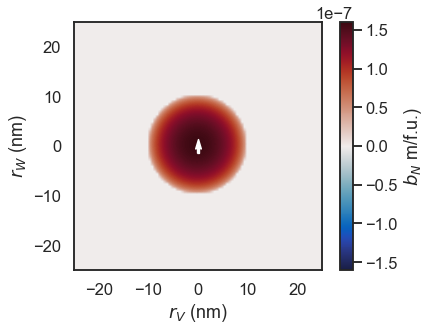

In [5]:
""" 
plot real value of the scattering length of sample 
transformed into the beamline coordinate system U, V, W 
"""
experiment.Sample.plot_scattering_length(plane='VW', step_size=0.5e-9, show_magnetic=True)

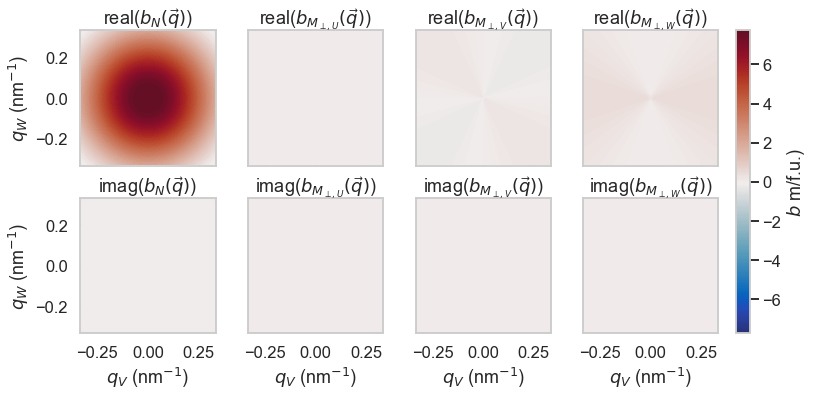

In [6]:
""" plot structural and magnetic scattering length components in reciprocal space """
experiment.plot_scattering_lengths()

## Plotting (polarisation-dependent) scattering cross sections

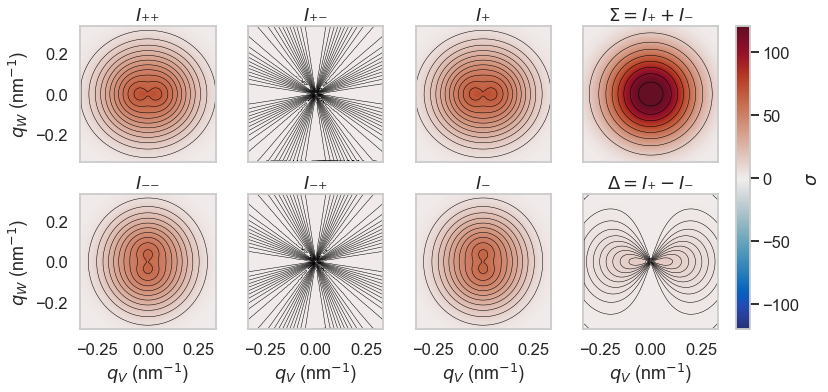

In [7]:
""" plot all scattering cross sections """
# if halfpol=True only the right four plots are shown
experiment.plot_scattering_patterns(halfpol=False) 

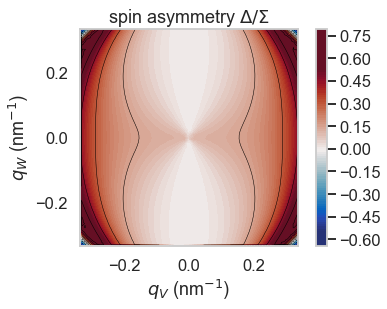

In [8]:
""" 
Plot a specific property from the data output only (see data columns given above).

All terms to the scattering cross section are real-valued.
Imaginary terms of the scattering 

This function can be used to plot onto specific axes 
of a custom display layout (ax and title keywords).
"""
experiment.plot_property('asym', plot_imag=False, contours=True)

## Plotting radial and angular averages

Functions are work in progress. Further options can be viewed using `experiment.command?`.

C:\ProgramData\Anaconda3\lib\site-packages\mm2sans-0.1-py3.6.egg\mm2SANS\experiment.py:870: RuntimeWarning: invalid value encountered in less_equal
C:\ProgramData\Anaconda3\lib\site-packages\mm2sans-0.1-py3.6.egg\mm2SANS\experiment.py:870: RuntimeWarning: invalid value encountered in less


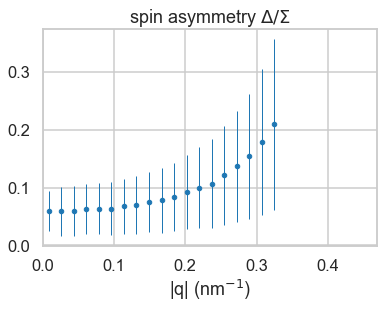

In [9]:
experiment.plot_radial_average(column_name='asym')

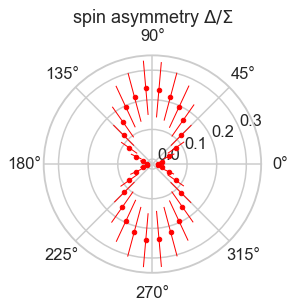

In [10]:
experiment.plot_angular_average(column_name='asym')

## Brute-force calculation of periodic repetitions

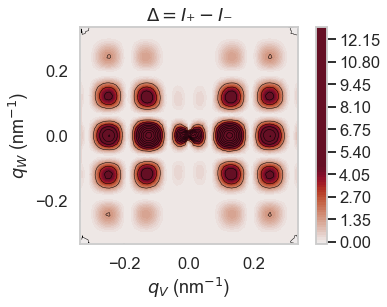

In [11]:
""" (brute-force) calculation scattering pattern for a periodic repetition (usually only a few are needed) """
# use with caution, result is very dependent on number of repetitions!
experiment.calc_scattering_pattern(uc_repetitions=(2,2,2), print_diagnostics=False)
experiment.plot_property('I_dif')